# INTRODUCTION 

I have been living in the Boston area for the last few years since grad school. The dataset analyzed for the purposes of this project pertains to the Boston area. The Boston area dataset was exported from [openstreetmaps](http://www.openstreetmap.org/#map=17/40.71652/-73.94470&layers=H). The analysis included the following steps 

* **Question Phase:** This phase involves asking general questions about the dataset. The questions involve the problem we are trying to solve for. 
* **Data Auditing:** This phase involves auditing the data to identify anomalies and patterns. E.g. In the streetmap data we could run into street names which have some kind special characters in them, or we could run into zipcodes in the Boston area that have some kind of alphabetical characters in them. 
* **Data Cleansing:** This phase involves classifying the anomalies that are identified in the previous step and devising approaches to clean up the data. The cleansing could be either manual or done programmatically. The project assumes both a programmatic and a manual approach to cleansing data. The focus is mostly been around cleansing the data programmatically. However in certain cases there is also a need for a manual review 

Data Auditing and Data Cleansing follow a repetive approach till a fair amount of data anomalies have been identified and also cleansed approrpriately. 

* **Conclusion:** This phase involves drawing conclusion about the dataset, based on the auditing and cleansing steps 
* **Communication:** The phase involves communicating the results of the analysis to the audiences. In a real life scenario this would be the business users who make business decisions based on the dataset analysis. 

In addition, this project also involves importing the dataset into [mongoDB](https://www.mongodb.com/), followed by executing some of the mongoDB's aggregation commands to further analyze the dataset that has been imported. 






# Question Phase



# Data Auditing

One of the first steps involved understanding the dataset. This involved understanding some aspects of understanding the metadata inaddition to understanding the data elements that lies underneath that. 

Some aspects of understanding the metadata involved 

* Tag Analysis: Identifying the different tags present in the XML, along with the count of occurences of each of the tags 
* User Analysis: Identifying the count of Unique Users and the number of contributions made by the users (based on both UIDs and Users) 


 


# Tag Analysis (Analysis of XML Tags) 

**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/Data%20Auditing/XML%20Tag%20Count%20.py

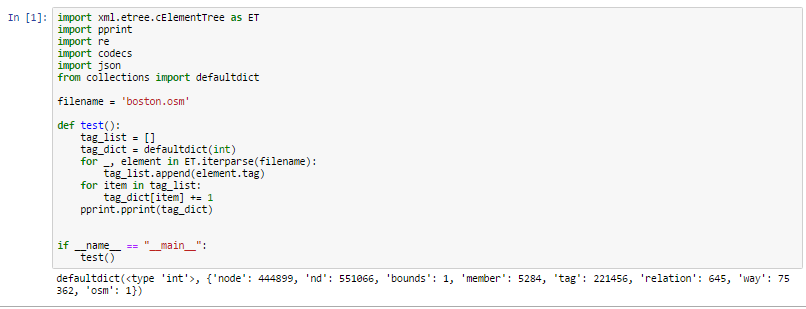

In [1]:
from IPython.display import Image
Image(filename='taganalysis.png')

# User Analysis (Analysis of UID Tags) 
**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/Data%20Auditing/Count_of_Unique_UserIds.py

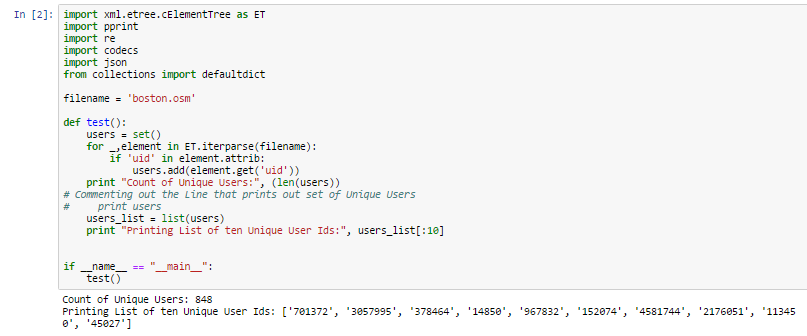

In [21]:
from IPython.display import Image
Image(filename='uidanalysis.png')

# User Analysis (Analysis of User Tags) 
**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/Data%20Auditing/Count_of_Unique_Users.py

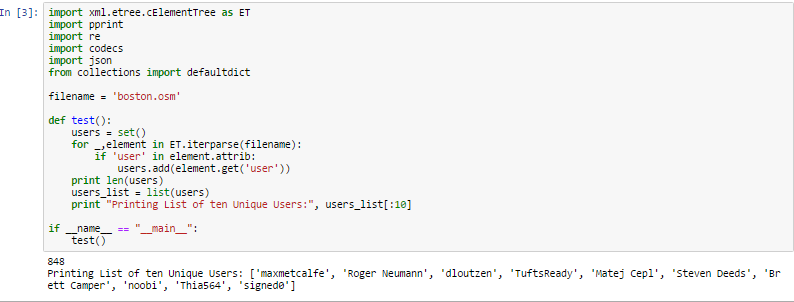

In [3]:
from IPython.display import Image
Image(filename='useranalysis.png')

# User Analysis (Analysis of User Contribution Counts) 
**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/Data%20Auditing/User_Contribution_Count.py

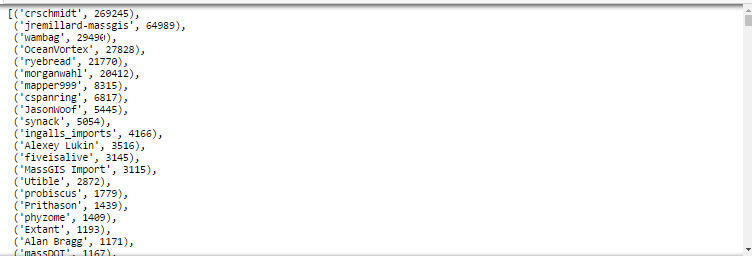

In [22]:
from IPython.display import Image
Image(filename='usercontribution.png')

**The top ten contributors based on the results of the output above:**
[('crschmidt', 269245),
 ('jremillard-massgis', 64989),
 ('wambag', 29490),
 ('OceanVortex', 27828),
 ('ryebread', 21770),
 ('morganwahl', 20412),
 ('mapper999', 8315),
 ('cspanring', 6817),
 ('JasonWoof', 5445),
 ('synack', 5054)]
 
 In addition did some research on crschmidt and found this (http://crschmidt.net/mapping/). Looks like the user has been actively contributing to the online map community via series of hacks 

## The next step of data analysis involved looking closer at the data elements. E.g. Address Values, ZipCodes, Phonenumbers. This process involves identifying specific patterns and anomalies, which needs to be standardized as a part of the cleansing proceess 

## Addr Tag Analysis: 

## This step involves auditing the value of the addr tags for 

1. Lower Case Characters 
2. Lower Case Characters with Colon 
3. Problematic Characters 

The final output includes a dictionary with keys for each of the category and the count of values for each of the categories


**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/Data%20Auditing/Validating_Addr_Tags.py

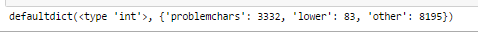

In [5]:
from IPython.display import Image
Image(filename='addrtaganalysis.png')

## Street Name Analysis 

**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/Data%20Auditing/Auditing_Address_Anomalies.py

This step involves auditing the different variations of the street names and identifying the different anomalies and variations.The result shows different variation for street (e.g. ST, st, St.) 

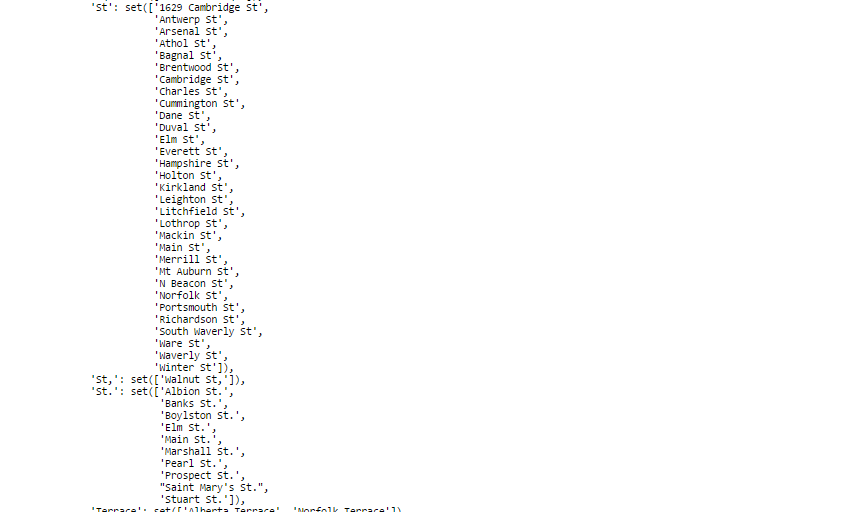

In [23]:
from IPython.display import Image
Image(filename='streetanalysis.png')

## Phone Number Analysis

**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/Data%20Auditing/Auditing_Phone_Anomalies.py

Careful analysis of the Phone Numbers identified a few anomalies that required some level of standardization. Some of the anomalies identified were as follows 

* Numbers with Country Cod. E.g. +16175722000
* Numbers with Hyphens in them. E.g. 617-484-6668
* Numbers with spaces in them. E.g. 617 666 0000
* Numbers with periods in them. E.g. 17.588.2628
* Numbers with Alphabets in them. E.g. +1617958DELI
* Numbers with paranthesis in them. E.g (617) 576-2220

## ZipCode Analysis

Careful Analysis of the Zipcodes identified two major anomalies 

* Zipcodes with State names in them. E.g. MA 02116
* Zipcodes with the 4 digit extension, seperated by a hyphen from the main 5 digit zipcode. E.g. 02138-2742


# Data Cleansing 

This step involves cleansing some of the anomalies identified before with the street names, phone numbers and zipcodes. 


## Street Name Cleansing 

**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/Data%20Cleansing/Cleansing_Street_Names.py

This steps involves a mapping dictionary which has the mapping between the incorrect format and the correct format of the street names in the form of key/value pairs.The cleansing step involves looping through the XML and validating to see if the value can be found in the mapping dictionary. If the mapping is found then appropriate replacement is done to the street name using the python replace method

Attached below is the snippet of the clean up result for street names 

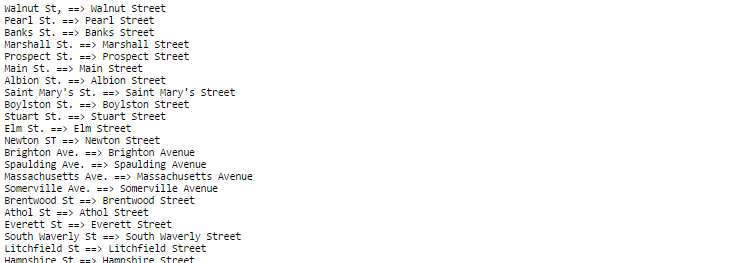

In [7]:
from IPython.display import Image
Image(filename='streetcleanup.png')

## Phone Number Cleansing 

**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/Data%20Cleansing/Cleansing_PhoneNumbers.py

This step involved standardizing the different phone number formats to make them into a simple 10 digit format (e.g. 6177518151). This involved identifying and removing 

* Extra spaces 
* Hyphens 
* Paranthesis 
* Removing +1 (Some numbers started with the country code) 
* Commas 

Some phone numbers had alphabets in them. Those phone numbers were sent to a seperate python list to be reviewed manually. All other anomalies were cleaned manually using python regular expressions. Attached below is the screenshot of the high level phone cleansing stats 



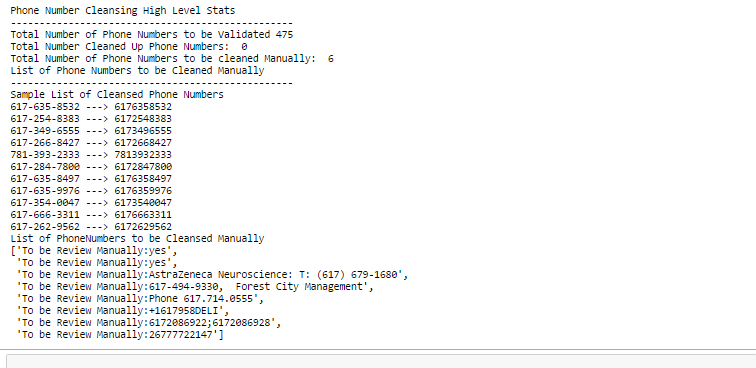

In [8]:
from IPython.display import Image
Image(filename='phonecleanup.png')

## Zip Code Cleansing 

**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/Data%20Cleansing/Cleansing_Zipcodes.py

This step involves standardizing the different zipcodes into a generic format. The two main anomalies found were 

* Zipcodes with extensions seperated by hyphens 
* Zipcodes with alphabets in them 

THe clean up process involved identifying the zipcodes with the 4 four digit extensions, and then just using the first part of the zipcode and leaving out the extensions. For Zipcodes that had alphabets in them, the zipcodes were written into a python list for further manual review 

Attached below is the screenshot of the high level zipcode cleansing stats 



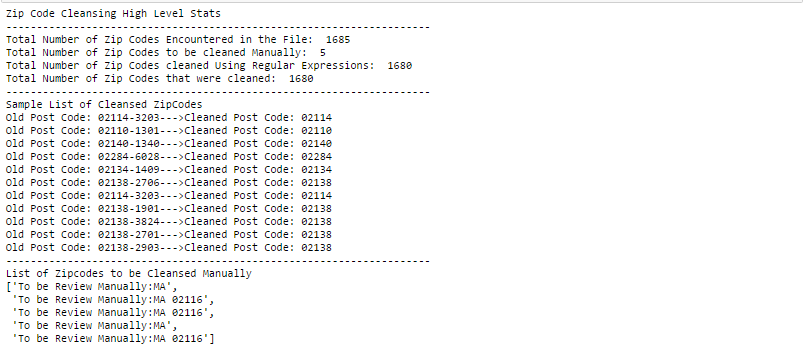

In [9]:
from IPython.display import Image
Image(filename='zipcleanup.png')

# JSON Creation for Mongo Import 

This step involves creation of a JSON file for importing the file to MongoDB. 


**Github Source:** https://github.com/Ajinth/Python-Data-Analysis/blob/master/MongoDB/XML_to_Json_Import.py


The key thing to note is that all the cleansing routines (for Street Names, Phone Numbers and Zipcodes) are called as a part of the Mongo Import. Attaching some sample screenshots for street names and phone numbers before and after cleansing. 

The unclean version is in the OSM XML file and the cleaned version is in the JSON file ready for Mongo Import 

## Street Name: (Before Cleaning) 

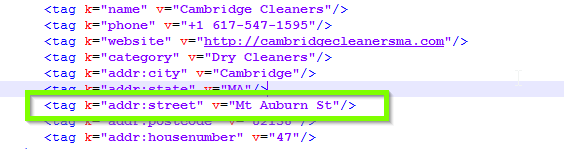

In [2]:
from IPython.display import Image
Image(filename='oldstreetname.png')

## Street Name: After Cleaning 

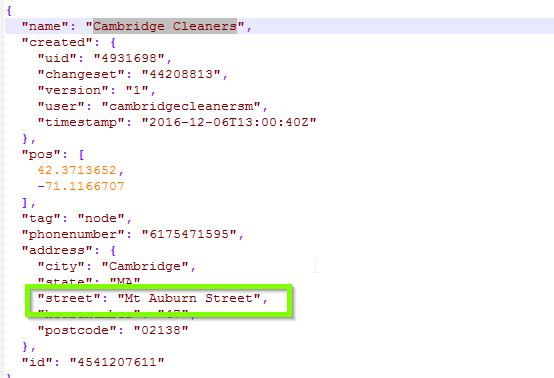

In [4]:
from IPython.display import Image
Image(filename='newstreetname.png')

## Phone Number: (Before Cleaning) 

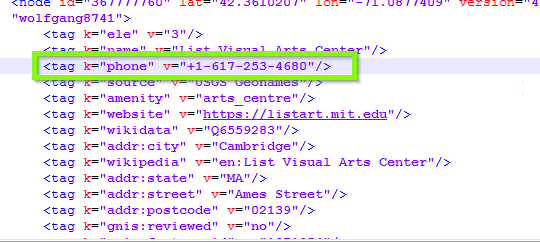

In [20]:
from IPython.display import Image
Image(filename='oldphonenumber.png')

## Phone Number: (After Cleaning)

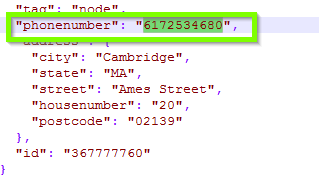

In [21]:
from IPython.display import Image
Image(filename='newphonenumber.png')

# Mongo DB Analysis

In [9]:
import pymongo
from pymongo import MongoClient
import pprint
client = MongoClient()
db = client.boston
print db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'boston')


# Assessing the Size of the Original OSM File and the JSON File 

In [10]:
import os
print 'The original OSM file is {} MB'.format(os.path.getsize('Boston.osm')/1.0e6)
print 'The JSON file is {} MB'.format(os.path.getsize('Boston.osm' + ".json")/1.0e6)

The original OSM file is 100.298777 MB
The JSON file is 145.96108 MB


In [11]:
boston = db['bostonc']

# Number of Documents

In [12]:
boston.find().count()

520261

# Number of Unique Users

In [13]:
len(boston.distinct('created.user'))

827

# Number of Nodes and Ways

In [14]:
print "Number of nodes:",boston.find({'tag': 'node'}).count()
print "Number of ways:", boston.find({'tag': 'way'}).count()

Number of nodes: 444899
Number of ways: 75362


# Top 10 Contributors along with the UserNames

In [15]:
result = boston.aggregate( [
                                        { "$group" : {"_id" : "$created.user", "count" : { "$sum" : 1} } },
                                        { "$sort" : {"count" : -1} }, 
                                        { "$limit" : 10 } ] )

pprint.pprint(list(result))

[{u'_id': u'crschmidt', u'count': 269155},
 {u'_id': u'jremillard-massgis', u'count': 64989},
 {u'_id': u'wambag', u'count': 29468},
 {u'_id': u'OceanVortex', u'count': 27793},
 {u'_id': u'ryebread', u'count': 21755},
 {u'_id': u'morganwahl', u'count': 20291},
 {u'_id': u'mapper999', u'count': 8309},
 {u'_id': u'cspanring', u'count': 6817},
 {u'_id': u'JasonWoof', u'count': 5439},
 {u'_id': u'synack', u'count': 5042}]


# List of Top 10 Amenities in the Boston Area

In [16]:
result = boston.aggregate( [            {'$match': {'amenity': {'$exists': 1}}},
                                        { "$group" : {"_id" : "$amenity", "count" : { "$sum" : 1} } },
                                        { "$sort" : {"count" : -1} }, 
                                        { "$limit" : 10 } ] )

pprint.pprint(list(result))

[{u'_id': u'parking', u'count': 545},
 {u'_id': u'bench', u'count': 495},
 {u'_id': u'restaurant', u'count': 398},
 {u'_id': u'bicycle_parking', u'count': 214},
 {u'_id': u'school', u'count': 205},
 {u'_id': u'place_of_worship', u'count': 184},
 {u'_id': u'library', u'count': 162},
 {u'_id': u'cafe', u'count': 158},
 {u'_id': u'fast_food', u'count': 114},
 {u'_id': u'bicycle_rental', u'count': 89}]


# Extracting the List of Colleges from the DataSet

In [17]:
colleges = boston.aggregate([{"$match":{"amenity":{"$exists":1},
                                 "amenity":"college",}},      
                      {"$group":{"_id":{"Name":"$name"},
                                 "count":{"$sum":1}}},
                      {"$project":{"_id":0,
                                  "College":"$_id.Name",
                                  "Name":"$count"}},
                      {"$sort":{"Count":-1}}, 
                      {"$limit":10}])
pprint.pprint(list(colleges))

[{u'College': u'North Bennet Street School', u'Name': 1},
 {u'College': u'Radcliffe Quad', u'Name': 1},
 {u'College': u'Bunker Hill Community College', u'Name': 1},
 {u'College': u'Emerson College', u'Name': 7},
 {u'College': u'Berklee College of Music', u'Name': 7},
 {u'College': u'Emerson College \u2013 Walker Building', u'Name': 1},
 {u'College': u'Emerson College \u2013 Tuffte Performing Arts Center',
  u'Name': 1},
 {u'College': u'Fisher College', u'Name': 1},
 {u'College': u'Emerson College - Little Building', u'Name': 1},
 {u'College': u'Emerson College \u2013 Piano Row', u'Name': 1}]


**This list is definitely missing some of the key universities in the Boston Area like Harvard, MIT, NorthEastern. On further review of the dataset I noticed that the missing schools and colleges are infact a part of the dataset, they just don't have an amenity of college attached to them** 

# Extracting the list of Public Buildings in the Boston Area

In [18]:
building = boston.aggregate([{"$match":{"amenity":{"$exists":1},
                                 "amenity":"public_building",}},      
                      {"$group":{"_id":{"Name":"$name"},
                                 "count":{"$sum":1}}},
                      {"$project":{"_id":0,
                                  "Building":"$_id.Name",
                                  "Name":"$count"}},
                      {"$sort":{"Count":-1}}, 
                      {"$limit":10}])
pprint.pprint(list(building))

[{u'Building': None, u'Name': 1},
 {u'Building': u'Social Security Administration', u'Name': 1},
 {u'Building': u'Suffolk', u'Name': 5},
 {u'Building': u'Middlesex', u'Name': 2}]


# Extracting the Top Cities in the Boston Area

In [19]:
cities = boston.aggregate([
        {"$match": {"address.city":{"$exists":1}}}, 
        {"$group":{"_id":"$address.city", "count":{"$sum":1}}},
        {"$sort": {"count": -1}}, 
        {"$limit":10}                                 
    ])

pprint.pprint(list(cities))

[{u'_id': u'Boston', u'count': 619},
 {u'_id': u'Cambridge', u'count': 555},
 {u'_id': u'Somerville', u'count': 240},
 {u'_id': u'Arlington', u'count': 172},
 {u'_id': u'Allston', u'count': 17},
 {u'_id': u'Arlington, MA', u'count': 9},
 {u'_id': u'Charlestown', u'count': 9},
 {u'_id': u'Watertown', u'count': 9},
 {u'_id': u'Cambridge, MA', u'count': 8},
 {u'_id': u'Brookline', u'count': 7}]


# Conclusion and Other Suggested Improvements

Given the size of the Boston Data Set that was analyzed and the number of issues that existed with the dataset, it was a lot better than I anticipated. That said, there are definitely areas for improvement. E.g.We noticed inconsistencies with the street names while executing our auditing in Python. We also noticed some minor anomalies with ZipCode and the Phone data. In addition we found other issues around missing data, or the data being associated with different types 

1. When we executed a query to extract the list of colleges in the Boston Area based on amenity == "college", the result set was missing some of the key institutions in the Boston area (e.g. MIT, Harvard, NorthEastern). On further analysis by looking at OSM file we noticed that the data is infact present, but just that it was associated with a different type. 
2. Similarly, when we executed a query to extract the list of public buildings in the Boston Area based on amenity == "public_building, not a whole lot of buildings showed up. 

If we further analyze the root cause for 1 and 2, we can definitely conclude that these are the effects of manual contribution from hundreds and hundreds of users over the web. 

## Here are some recommendations to improve the quality of data within Open Street Maps
### Option 1: Structured Input Form: 

One approach to rectify this would be to use a structured input form to consume data from the users 

#### Pros: 
1. Forces users to input data by adhering to a general format 

#### Cons: 
2. In some cases the form restrictions might prevent users from entering valid data. In situations like those users might either leave the data as blank and proceed or enter data to adhere to the form settings, but might be incorrect data. E.g. Say if the List of Cities is presented as a Drop Down Value, and the user is not able to find the relevant city, they might be inclined to select another neighbouring city for the purposes of ingesting the value into the maps. This would lead to other issues and subsequent clean ups. 

### Option 2: Address Validation using WebService Calls with other Address Verification Services 
Utilize Address Verification Services (E.g. LexisNexis, DOTS, smartystreets) via API calls to validate the Address being entered either via Synchronous Calls. The API could inturn return a much cleaner version of the Address, which could then be consumed and ingested into OpenStreetmaps. 

#### Pros: 
1. The Synchronous call to a Address Verification service will serve as an Address Cleansing Step prior to the ingestion into Open Street maps. 

#### Cons: 

1. API services might be costly, and OpenStreet might have to pay for those services. This might defeat the purpose of OpenStreet Map being a open source project 

2. The intermediate third party API call might slow down the Address Intake process from a user perspective as the user will have to wait for the response from the Synchronous Call 


In addition, it might be a good idea to organize Hackathons/Meetups in different parts of the country to cleanse the dataset in a particular area. E.g A hackathon in the Boston Area could be tasked with the force to cleanse the Boston Area dataset on a periodic basis. Just judging by the sheer volume of datasets for the Boston area alone and extrapolating it to datasets across the world, data wranglers across the world would have a field data cleansing the open street map datasets. 
